Install Kaggle API library and Upload kaggle.json file for authentication

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedabolyazeed","key":"6658410e2d980c97107f323553aae768"}'}

Prepare Kaggle API credentials

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download the IMDb dataset from Kaggle

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other


Unzip the IMDb dataset

In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews -d imdb-dataset-of-50k-movie-reviews

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv  


Import required libraries and list all files in the dataset directory

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Load & Explore IMDB Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Data Cleaning

In [ ]:
import re
import nltk
from nltk.stem import PorterStemmer

stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',
    't', 'can', 'will', 'just', 'don', 'should', 'now'
])

stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['cleaned_review'] = df['review'].apply(clean_text)

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.dropna(subset=['sentiment'], inplace=True)

df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...


sentiment for rows 400 to 410

In [ ]:
#df.loc[400:410, ['review', 'cleaned_review', 'sentiment']]

Splitting Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42
)

print(y_train.unique())
print(y_train.isnull().sum())
print("NaNs in y_train:", y_train.isna().sum())
print(f"Training Data: {len(X_train)} reviews")
print(f"Testing Data: {len(X_test)} reviews")

[0 1]
0
NaNs in y_train: 0
Training Data: 40000 reviews
Testing Data: 10000 reviews


Text Vectorization using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training TF-IDF shape: {X_train_tfidf.shape}")
print(f"Testing TF-IDF shape: {X_test_tfidf.shape}")

Training TF-IDF shape: (40000, 5000)
Testing TF-IDF shape: (10000, 5000)


Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)

log_train_acc = log_model.score(X_train_tfidf, y_train)
log_test_acc = log_model.score(X_test_tfidf, y_test)

print(f"[Logistic Regression] Training Accuracy: {log_train_acc:.4f}")
print(f"[Logistic Regression] Testing Accuracy:  {log_test_acc:.4f}")

[Logistic Regression] Training Accuracy: 0.9099
[Logistic Regression] Testing Accuracy:  0.8861


Logistic Regression Accuracy Visualization

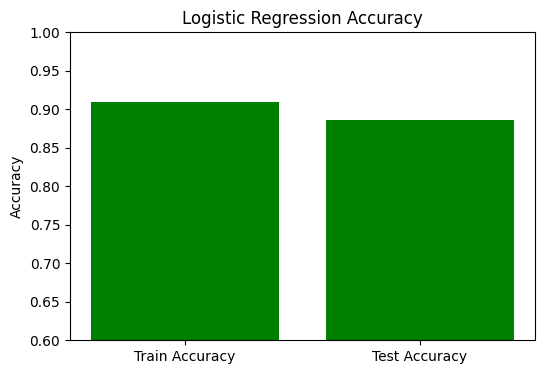

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [log_train_acc, log_test_acc], color='green')
plt.ylim(0.6, 1.0)
plt.title("Logistic Regression Accuracy")
plt.ylabel("Accuracy")
plt.show()

Train Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_tfidf, y_train)

tree_train_acc = tree_model.score(X_train_tfidf, y_train)
tree_test_acc = tree_model.score(X_test_tfidf, y_test)

print(f"[Decision Tree] Training Accuracy: {tree_train_acc:.4f}")
print(f"[Decision Tree] Testing Accuracy:  {tree_test_acc:.4f}")

[Decision Tree] Training Accuracy: 1.0000
[Decision Tree] Testing Accuracy:  0.7198


Decision Tree Model Accuracy Visualization

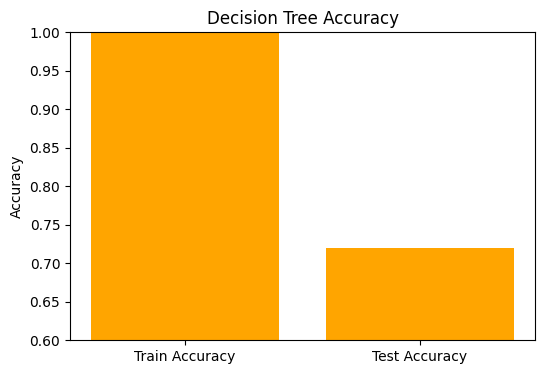

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [tree_train_acc, tree_test_acc], color='orange')
plt.ylim(0.6, 1.0)
plt.title("Decision Tree Accuracy")
plt.ylabel("Accuracy")
plt.show()

Train Naive Bayes Model and Accuracy Visualization

[Naive Bayes] Training Accuracy: 0.8591
[Naive Bayes] Testing Accuracy:  0.8490


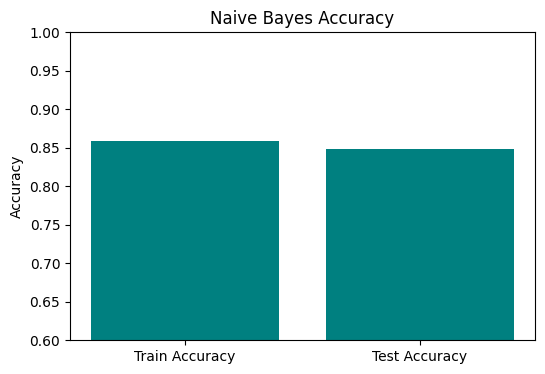

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_train_acc = nb_model.score(X_train_tfidf, y_train)
nb_test_acc = nb_model.score(X_test_tfidf, y_test)

print(f"[Naive Bayes] Training Accuracy: {nb_train_acc:.4f}")
print(f"[Naive Bayes] Testing Accuracy:  {nb_test_acc:.4f}")

plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [nb_train_acc, nb_test_acc], color='teal')
plt.ylim(0.6, 1.0)
plt.title("Naive Bayes Accuracy")
plt.ylabel("Accuracy")
plt.show()


Comparison of the Three models in a unified chart

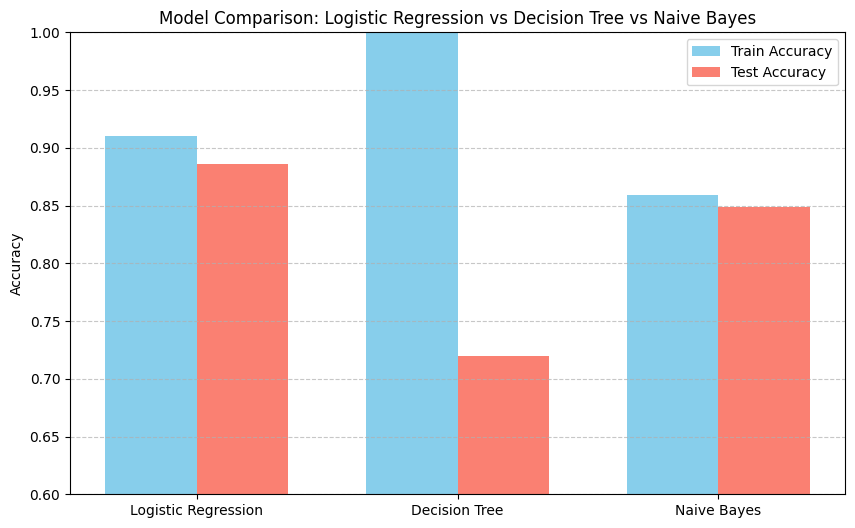

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes']
train_accuracies = [log_train_acc, tree_train_acc, nb_train_acc]
test_accuracies = [log_test_acc, tree_test_acc, nb_test_acc]

x = range(len(models))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], train_accuracies, width=bar_width, label='Train Accuracy', color='skyblue')
plt.bar([i + bar_width/2 for i in x], test_accuracies, width=bar_width, label='Test Accuracy', color='salmon')

plt.xticks(x, models)
plt.ylim(0.6, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Comparison: Logistic Regression vs Decision Tree vs Naive Bayes")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Dimensionality Reduction with Logistic Regression

[Logistic Regression + SVD] Training Accuracy: 0.8604
[Logistic Regression + SVD] Testing Accuracy:  0.8599


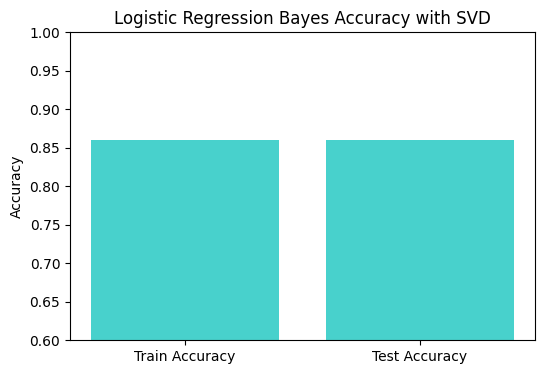

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

log_model_svd = LogisticRegression()
log_model_svd.fit(X_train_svd, y_train)

log_train_acc_svd = log_model_svd.score(X_train_svd, y_train)
log_test_acc_svd = log_model_svd.score(X_test_svd, y_test)

print(f"[Logistic Regression + SVD] Training Accuracy: {log_train_acc_svd:.4f}")
print(f"[Logistic Regression + SVD] Testing Accuracy:  {log_test_acc_svd:.4f}")

plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [log_train_acc_svd, log_test_acc_svd], color='mediumturquoise')
plt.ylim(0.6, 1.0)
plt.title("Logistic Regression Bayes Accuracy with SVD")
plt.ylabel("Accuracy")
plt.show()

Dimensionality Reduction with Decision Tree

[Decision Tree + SVD] Training Accuracy: 1.0000
[Decision Tree + SVD] Testing Accuracy:  0.7168


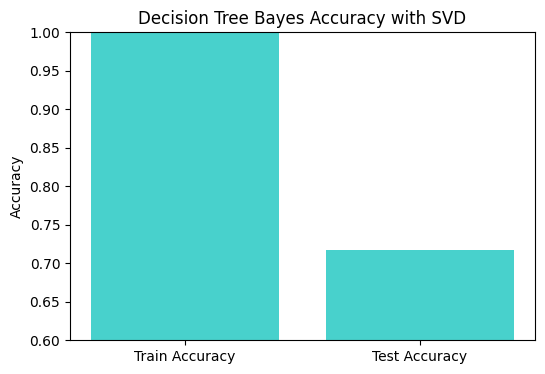

In [ ]:
tree_model_svd = DecisionTreeClassifier()
tree_model_svd.fit(X_train_svd, y_train)

tree_train_acc_svd = tree_model_svd.score(X_train_svd, y_train)
tree_test_acc_svd = tree_model_svd.score(X_test_svd, y_test)

print(f"[Decision Tree + SVD] Training Accuracy: {tree_train_acc_svd:.4f}")
print(f"[Decision Tree + SVD] Testing Accuracy:  {tree_test_acc_svd:.4f}")


plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [tree_train_acc_svd, tree_test_acc_svd], color='mediumturquoise')
plt.ylim(0.6, 1.0)
plt.title("Decision Tree Bayes Accuracy with SVD")
plt.ylabel("Accuracy")
plt.show()

Dimensionality Reduction with Naive Bayes

[Naive Bayes (Gaussian) + SVD] Training Accuracy: 0.7998
[Naive Bayes (Gaussian) + SVD] Testing Accuracy:  0.8012


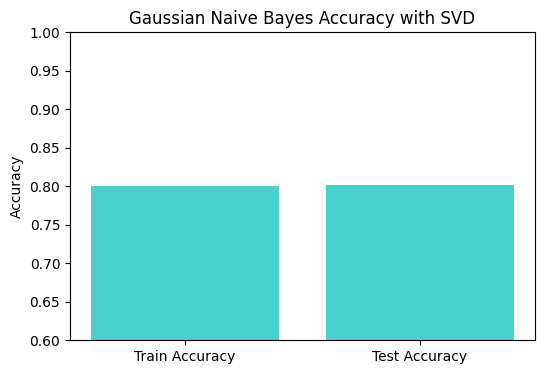

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model_svd = GaussianNB()
nb_model_svd.fit(X_train_nb_svd, y_train)

nb_train_acc_svd = nb_model_svd.score(X_train_nb_svd, y_train)
nb_test_acc_svd = nb_model_svd.score(X_test_nb_svd, y_test)

print(f"[Naive Bayes (Gaussian) + SVD] Training Accuracy: {nb_train_acc_svd:.4f}")
print(f"[Naive Bayes (Gaussian) + SVD] Testing Accuracy:  {nb_test_acc_svd:.4f}")

# رسم النتائج
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [nb_train_acc_svd, nb_test_acc_svd], color='mediumturquoise')
plt.ylim(0.6, 1.0)
plt.title("Gaussian Naive Bayes Accuracy with SVD")
plt.ylabel("Accuracy")
plt.show()


Logistic Regression and Decision Tree (before & after SVD)

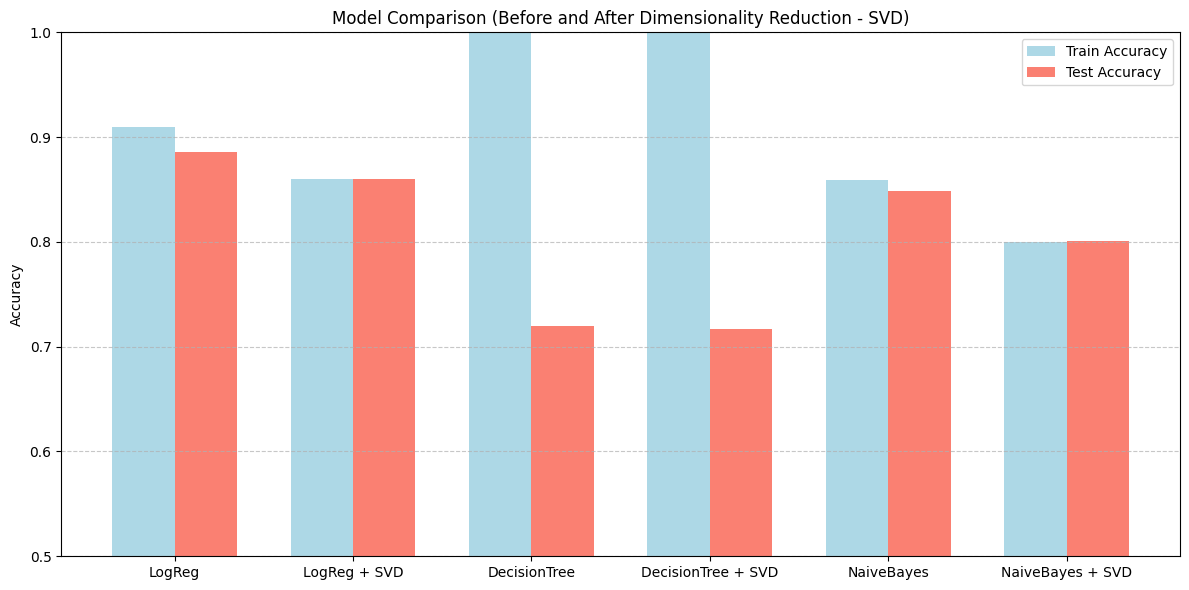

In [ ]:
import matplotlib.pyplot as plt

models = [
    "LogReg", "LogReg + SVD",
    "DecisionTree", "DecisionTree + SVD",
    "NaiveBayes", "NaiveBayes + SVD"
]

train_accuracies = [
    log_train_acc, log_train_acc_svd,
    tree_train_acc, tree_train_acc_svd,
    nb_train_acc, nb_train_acc_svd
]

test_accuracies = [
    log_test_acc, log_test_acc_svd,
    tree_test_acc, tree_test_acc_svd,
    nb_test_acc, nb_test_acc_svd
]

x = range(len(models))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], train_accuracies, width=bar_width, label='Train Accuracy', color='lightblue')
plt.bar([i + bar_width/2 for i in x], test_accuracies, width=bar_width, label='Test Accuracy', color='salmon')

plt.xticks(x, models)
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Comparison (Before and After Dimensionality Reduction - SVD)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Model Evaluation with Logistic Regression

[Logistic Regression] Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



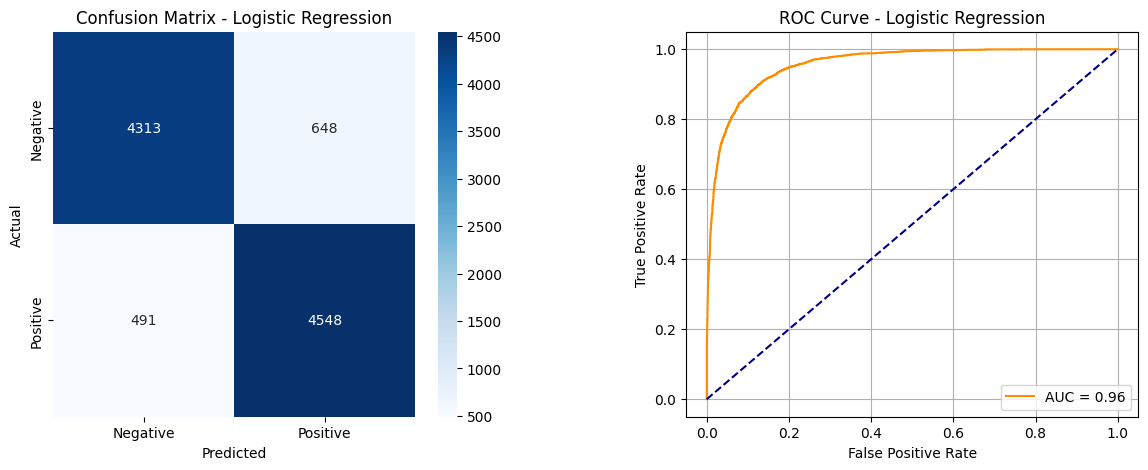

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = log_model.predict(X_test_tfidf)
y_scores = log_model.predict_proba(X_test_tfidf)[:, 1]

print("[Logistic Regression] Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

# ▪️ Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
            ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ▪️ ROC Curve
axes[1].plot(fpr, tpr, color='darkorange', label=f'AUC = {auc:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Logistic Regression")
axes[1].legend(loc='lower right')
axes[1].grid(True)

plt.show()

Confusion Matrix - Logistic Regression + SVD

[Logistic Regression + SVD] Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



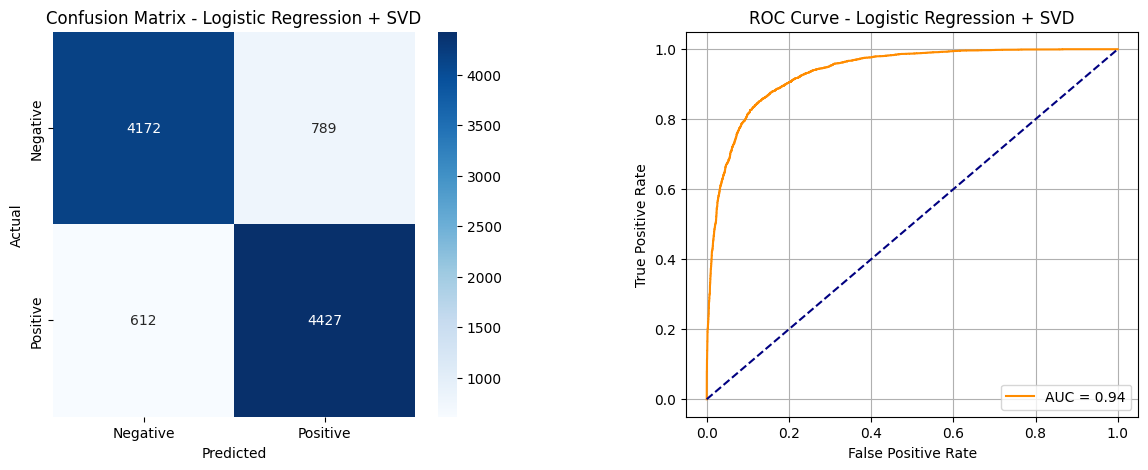

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_log_svd = log_model_svd.predict(X_test_svd)
y_scores_log_svd = log_model_svd.predict_proba(X_test_svd)[:, 1]

print("[Logistic Regression + SVD] Classification Report:")
print(classification_report(y_test, y_pred_log_svd))

cm_log = confusion_matrix(y_test, y_pred_log_svd)
fpr_log, tpr_log, _ = roc_curve(y_test, y_scores_log_svd)
auc_log = roc_auc_score(y_test, y_scores_log_svd)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

# ▪️ Confusion Matrix
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
            ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression + SVD")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ▪️ ROC Curve
axes[1].plot(fpr_log, tpr_log, color='darkorange', label=f'AUC = {auc_log:.2f}')
axes[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Logistic Regression + SVD")
axes[1].legend(loc="lower right")
axes[1].grid(True)

plt.show()


Model Evaluation with Decision Tree

[Decision Tree] Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      4961
           1       0.72      0.72      0.72      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



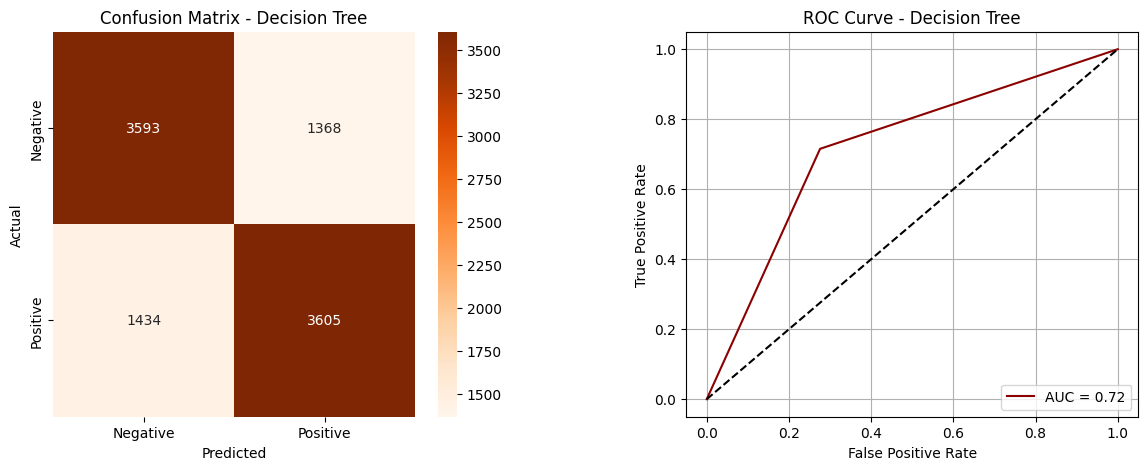

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_tree = tree_model.predict(X_test_tfidf)

print("[Decision Tree] Classification Report:")
print(classification_report(y_test, y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree)

y_scores_tree = tree_model.predict_proba(X_test_tfidf)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_scores_tree)
auc_tree = roc_auc_score(y_test, y_scores_tree)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

# ▪️ Confusion Matrix
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
            ax=axes[0])
axes[0].set_title("Confusion Matrix - Decision Tree")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ▪️ ROC Curve
axes[1].plot(fpr_tree, tpr_tree, color='darkred', label=f'AUC = {auc_tree:.2f}')
axes[1].plot([0, 1], [0, 1], color='black', linestyle='--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Decision Tree")
axes[1].legend(loc='lower right')
axes[1].grid(True)

plt.show()

Confusion Matrix - Decision Tree + SVD

[Decision Tree + SVD] Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      4961
           1       0.72      0.71      0.72      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



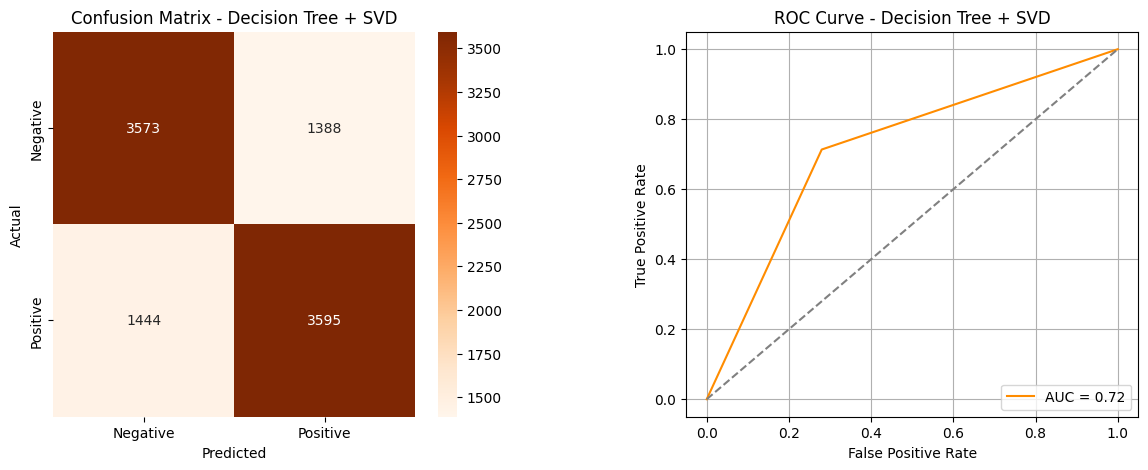

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_tree_svd = tree_model_svd.predict(X_test_svd)
y_scores_tree_svd = tree_model_svd.predict_proba(X_test_svd)[:, 1]

print("[Decision Tree + SVD] Classification Report:")
print(classification_report(y_test, y_pred_tree_svd))

cm_tree_svd = confusion_matrix(y_test, y_pred_tree_svd)
fpr_tree_svd, tpr_tree_svd, _ = roc_curve(y_test, y_scores_tree_svd)
auc_tree_svd = roc_auc_score(y_test, y_scores_tree_svd)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

# ▪️ Confusion Matrix
sns.heatmap(cm_tree_svd, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
            ax=axes[0])
axes[0].set_title("Confusion Matrix - Decision Tree + SVD")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ▪️ ROC Curve
axes[1].plot(fpr_tree_svd, tpr_tree_svd, color='darkorange', label=f'AUC = {auc_tree_svd:.2f}')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Decision Tree + SVD")
axes[1].legend(loc='lower right')
axes[1].grid(True)

plt.show()

Model Evaluation with Naive Bayes

[Naive Bayes] Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



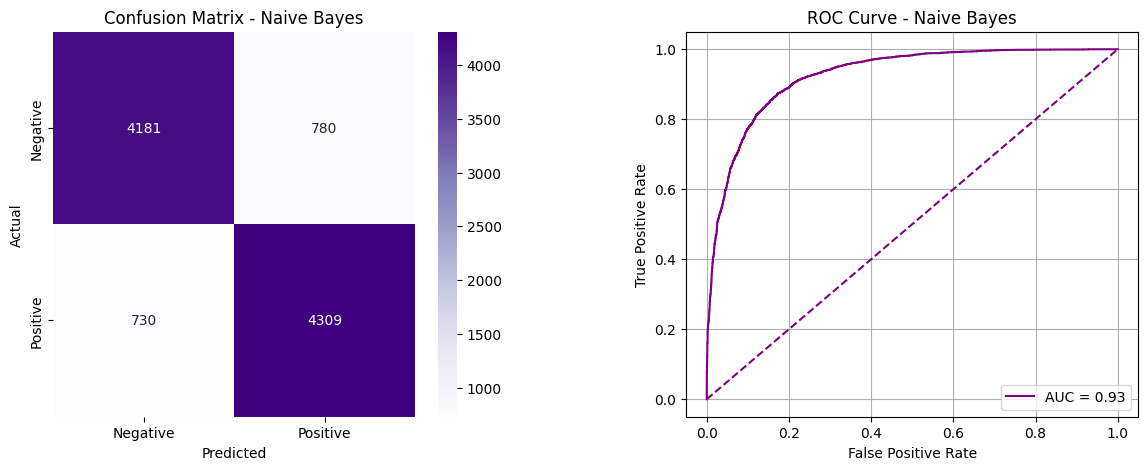

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_nb = nb_model.predict(X_test_tfidf)
y_scores_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]

print("[Naive Bayes] Classification Report:")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)
auc_nb = roc_auc_score(y_test, y_scores_nb)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

# ▪️ Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
            ax=axes[0])
axes[0].set_title("Confusion Matrix - Naive Bayes")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ▪️ ROC Curve
axes[1].plot(fpr_nb, tpr_nb, color='purple', label=f'AUC = {auc_nb:.2f}')
axes[1].plot([0, 1], [0, 1], color='purple', linestyle='--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Naive Bayes")
axes[1].legend(loc="lower right")
axes[1].grid(True)

plt.show()

Confusion Matrix - Naive Bayes + SVD

[Naive Bayes + SVD] Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      4961
           1       0.78      0.85      0.81      5039

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



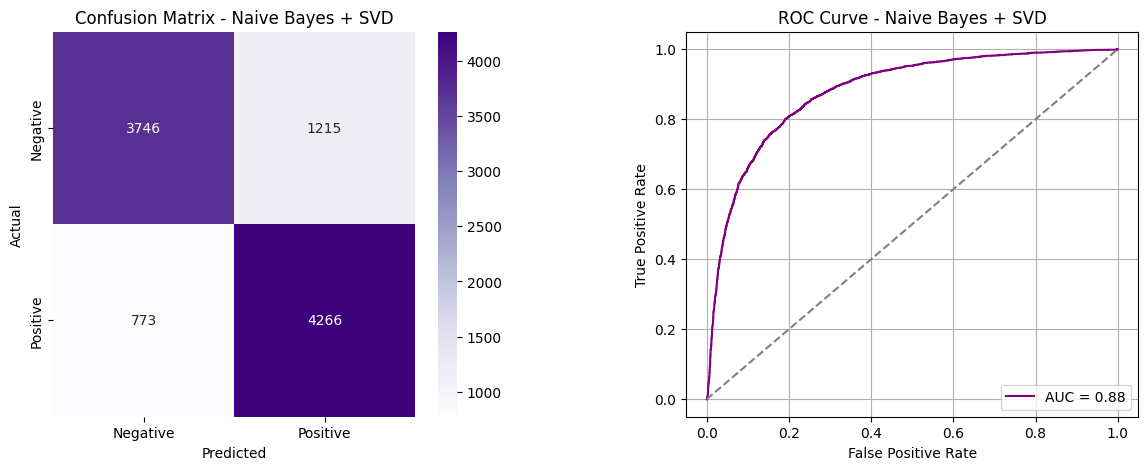

In [ ]:
y_pred_nb_svd = nb_model_svd.predict(X_test_nb_svd)
y_scores_nb_svd = nb_model_svd.predict_proba(X_test_nb_svd)[:, 1]

print("[Naive Bayes + SVD] Classification Report:")
print(classification_report(y_test, y_pred_nb_svd))

cm_nb_svd = confusion_matrix(y_test, y_pred_nb_svd)
fpr_nb_svd, tpr_nb_svd, _ = roc_curve(y_test, y_scores_nb_svd)
auc_nb_svd = roc_auc_score(y_test, y_scores_nb_svd)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.4)

# ▪️ Confusion Matrix
sns.heatmap(cm_nb_svd, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"],
            ax=axes[0])
axes[0].set_title("Confusion Matrix - Naive Bayes + SVD")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ▪️ ROC Curve
axes[1].plot(fpr_nb_svd, tpr_nb_svd, color='purple', label=f'AUC = {auc_nb_svd:.2f}')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Naive Bayes + SVD")
axes[1].legend(loc="lower right")
axes[1].grid(True)

plt.show()

Sentiment Prediction on New Reviews with Logistic Regression

In [ ]:
def predict_sentiment(review):
    review_cleaned = clean_text(review)
    review_vectorized = vectorizer.transform([review_cleaned])
    prediction = log_model.predict(review_vectorized)[0]
    return "Positive" if prediction == 1 else "Negative"

new_reviews = [
    "This movie was absolutely amazing! I loved every part of it.",
    "I wasted two hours of my life watching this garbage. Terrible film!",
    "An okay movie, not great but not bad either.",
    "What a fantastic experience! The storyline and acting were top-notch.",
    "This was a complete disaster. Poor acting and a boring plot.",
    "The film had some good moments, but overall it was pretty average."
]


for review in new_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment(review)}\n")

Review: This movie was absolutely amazing! I loved every part of it.
Predicted Sentiment: Positive

Review: I wasted two hours of my life watching this garbage. Terrible film!
Predicted Sentiment: Negative

Review: An okay movie, not great but not bad either.
Predicted Sentiment: Negative

Review: What a fantastic experience! The storyline and acting were top-notch.
Predicted Sentiment: Positive

Review: This was a complete disaster. Poor acting and a boring plot.
Predicted Sentiment: Negative

Review: The film had some good moments, but overall it was pretty average.
Predicted Sentiment: Positive



Sentiment Prediction on New Reviews with Decision Tree

In [ ]:
def predict_sentiment(review):
    review_cleaned = clean_text(review)
    review_vectorized = vectorizer.transform([review_cleaned])
    prediction = tree_model.predict(review_vectorized)[0]
    return "Positive" if prediction == 1 else "Negative"

new_reviews = [
    "This movie was absolutely amazing! I loved every part of it.",
    "I wasted two hours of my life watching this garbage. Terrible film!",
    "An okay movie, not great but not bad either.",
    "What a fantastic experience! The storyline and acting were top-notch.",
    "This was a complete disaster. Poor acting and a boring plot.",
    "The film had some good moments, but overall it was pretty average."
]

for review in new_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment(review)}\n")

Review: This movie was absolutely amazing! I loved every part of it.
Predicted Sentiment: Positive

Review: I wasted two hours of my life watching this garbage. Terrible film!
Predicted Sentiment: Negative

Review: An okay movie, not great but not bad either.
Predicted Sentiment: Negative

Review: What a fantastic experience! The storyline and acting were top-notch.
Predicted Sentiment: Positive

Review: This was a complete disaster. Poor acting and a boring plot.
Predicted Sentiment: Negative

Review: The film had some good moments, but overall it was pretty average.
Predicted Sentiment: Positive



Sentiment Prediction on New Reviews with Naive Bayes

In [ ]:
def predict_sentiment(review):
    review_cleaned = clean_text(review)
    review_vectorized = vectorizer.transform([review_cleaned])
    prediction = nb_model.predict(review_vectorized)[0]
    return "Positive" if prediction == 1 else "Negative"

new_reviews = [
    "This movie was absolutely amazing! I loved every part of it.",
    "I wasted two hours of my life watching this garbage. Terrible film!",
    "An okay movie, not great but not bad either.",
    "What a fantastic experience! The storyline and acting were top-notch.",
    "This was a complete disaster. Poor acting and a boring plot.",
    "The film had some good moments, but overall it was pretty average."
]

for review in new_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment(review)}\n")

Review: This movie was absolutely amazing! I loved every part of it.
Predicted Sentiment: Positive

Review: I wasted two hours of my life watching this garbage. Terrible film!
Predicted Sentiment: Negative

Review: An okay movie, not great but not bad either.
Predicted Sentiment: Negative

Review: What a fantastic experience! The storyline and acting were top-notch.
Predicted Sentiment: Positive

Review: This was a complete disaster. Poor acting and a boring plot.
Predicted Sentiment: Negative

Review: The film had some good moments, but overall it was pretty average.
Predicted Sentiment: Negative



Sentiment Visualization

Positive reviews in training data: 19961
Negative reviews in training data: 20039


<ipython-input-74-6c02c1505841>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="coolwarm")


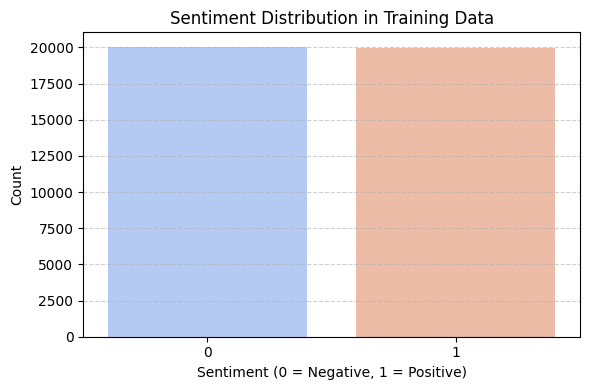

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

positive_count = y_train.sum()
negative_count = len(y_train) - positive_count

print(f"Positive reviews in training data: {positive_count}")
print(f"Negative reviews in training data: {negative_count}")

plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
